## GE_Nodes_GroceryStores-12months - Exploratory Analysis & Prototype Algorithm-15 Leaders and 15 Others (Laggards) (15_15 Sharing version)

### Software and Library Versions, and Logging

In [14]:
import sys
print(sys.version)

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [15]:
import platform
platform.python_version()

'3.6.1'

In [16]:
#import libraries

import pandas as pd
import time 
from datetime import datetime 
from IPython.display import Image
import os # operating system interface
print ("pandas version" , pd.__version__)

pandas version 0.20.2


### Memory management if needed below (not used)

### Load 15_15 leader and other pair

In [ ]:
import pandas as pd
import time 

#load leader file
start = time.time()

dfLoad_ld = pd.read_csv("C:/Users/jamesan/Downloads/dfLoad_ld_TOU_GS2B_Cell_Agg15.csv")

time.time() - start

In [ ]:
# View column headers and details
dfLoad_ld.head()

In [ ]:
#load laggard file
start = time.time()
dfLoad_lgg = pd.read_csv('C:/Users/jamesan/Downloads/dfLoad_lgg_TOU_GS2B_Cell_Agg15.csv')
                          
time.time() - start

In [ ]:
# View column headers and details
dfLoad_lgg.head()

In [ ]:
dfLoad_ld=GroceryTOU_GS3B_Q1L15_15
dfLoad_lgg=GroceryTOU_GS3B_Q1O15_15

### Profile

In [50]:
# Verify load within normal range, and possible data issues i.e. high max or low min relate to 25/75% 
dfLoad_ld.head()

,DatePeriod,Usage,year
0,2014-04-05 17:00:00,900.48,2014
1,2014-04-05 17:15:00,904.68,2014
2,2014-04-05 17:30:00,893.76,2014
3,2014-04-05 17:45:00,873.24,2014
4,2014-04-05 18:00:00,887.04,2014


In [51]:
dfLoad_lgg.describe()

,Usage,year
count,142765.000000,142765.000000
mean,746.968884,2015.796491
std,134.784065,1.225480
min,242.400000,2014.000000
25%,648.040000,2015.000000
50%,747.080000,2016.000000
75%,835.840000,2017.000000
max,1352.600000,2018.000000


In [52]:
#get range of time-series, 1 year ~ 35,040 based on 
print(len(dfLoad_ld))

142669


In [53]:
print(len(dfLoad_lgg))

142765


In [54]:
#dfLoad_ld["AggUsage"].value_counts()

### Transform/Munge - Date and Single year

In [55]:
#convert datetime character field to datetime format 
import datetime 
dfLoad_ld["DatePeriod"]=pd.to_datetime(dfLoad_ld['DatePeriod'], format='%d%b%Y:%H:%M:%S')
dfLoad_lgg["DatePeriod"]=pd.to_datetime(dfLoad_lgg['DatePeriod'], format='%d%b%Y:%H:%M:%S')

In [56]:
#Plot time series for Leader group
import ggplot
from ggplot import *

C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


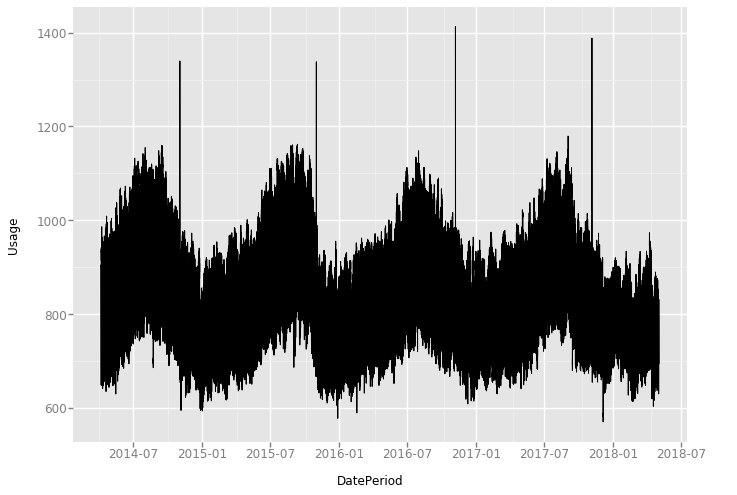

<ggplot: (142359030)>

In [57]:
ggplot(dfLoad_ld, aes('DatePeriod', 'Usage')) + geom_line(color='black')

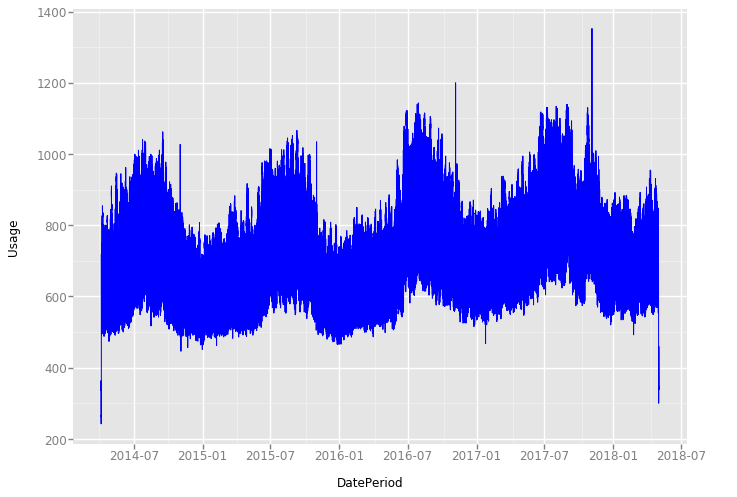

<ggplot: (144367017)>

In [58]:
#Plot time series for Laggards group
ggplot(dfLoad_lgg, aes('DatePeriod', 'Usage')) + geom_line(color='blue')

In [59]:
#Divvide the load by 15 customers to get the average load for both the Leader and Laggard group
dfLoad_ld["AvgUsage"]=dfLoad_ld.Usage/33
dfLoad_lgg["AvgUsage"]=dfLoad_lgg.Usage/88.0

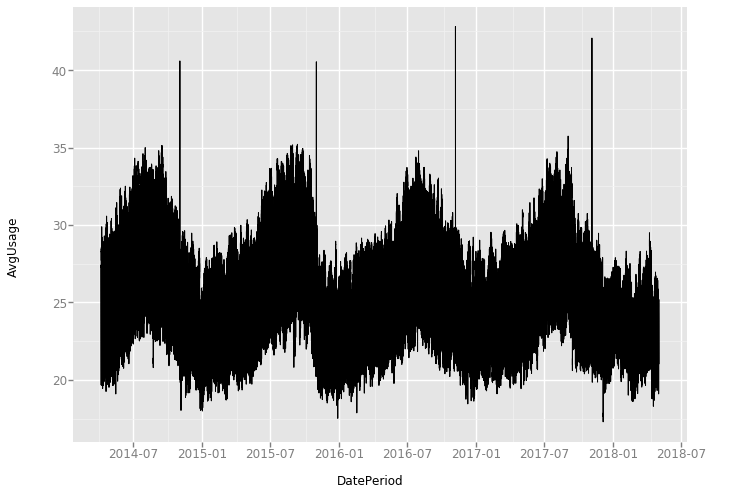

<ggplot: (142361131)>

In [60]:
ggplot(dfLoad_ld, aes('DatePeriod', 'AvgUsage')) + geom_line(color='black')

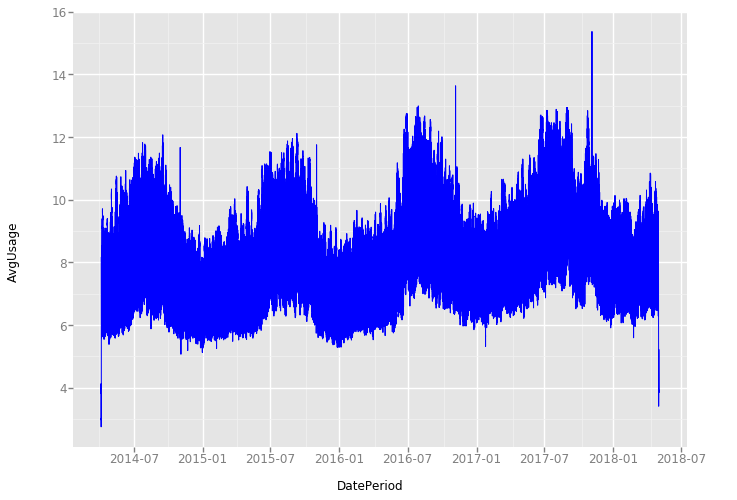

<ggplot: (144608667)>

In [61]:
ggplot(dfLoad_lgg, aes('DatePeriod', 'AvgUsage')) + geom_line(color='blue')

### Filter out 2017 only 

In [62]:
#Extract and create new data time columns - day, month, hour, year, dayofyear for heatmaps etc.
dfLoad_ld['day'] = dfLoad_ld['DatePeriod'].dt.day
dfLoad_ld['month'] = dfLoad_ld['DatePeriod'].dt.month
dfLoad_ld['hour'] = dfLoad_ld['DatePeriod'].dt.hour
dfLoad_ld['year'] = dfLoad_ld['DatePeriod'].dt.year
dfLoad_ld['day_of_year'] = dfLoad_ld['DatePeriod'].dt.dayofyear

dfLoad_lgg['day'] = dfLoad_lgg['DatePeriod'].dt.day
dfLoad_lgg['month'] = dfLoad_lgg['DatePeriod'].dt.month
dfLoad_lgg['hour'] = dfLoad_lgg['DatePeriod'].dt.hour
dfLoad_lgg['year'] = dfLoad_lgg['DatePeriod'].dt.year
dfLoad_lgg['day_of_year'] = dfLoad_lgg['DatePeriod'].dt.dayofyear

In [63]:
#Verify columns were added
dfLoad_ld.keys()

Index(['DatePeriod', 'Usage', 'year', 'AvgUsage', 'day', 'month', 'hour',
       'day_of_year'],
      dtype='object')

In [64]:
dfLoad_lgg.keys()

Index(['DatePeriod', 'Usage', 'year', 'AvgUsage', 'day', 'month', 'hour',
       'day_of_year'],
      dtype='object')

In [65]:
#Filter out only 2017 measurements
dfLoad_ld2017 = dfLoad_ld[dfLoad_ld['year'] == 2017]
dfLoad_lgg2017 = dfLoad_lgg[dfLoad_lgg['year'] == 2017]

In [66]:
#Verify filtering by count
print(len(dfLoad_ld2017))

35036


In [67]:
print(len(dfLoad_lgg2017))

35036


In [68]:
# ========= 
dfLoad_lgg2017[(dfLoad_lgg2017.month == 1) & (dfLoad_lgg2017.day == 2)]#dfLoad_lgg2017.day_of_year == 4 & ]

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year
96308,2017-01-02 00:00:00,580.16,2017,6.592727,2,1,0,2
96309,2017-01-02 00:15:00,550.92,2017,6.260455,2,1,0,2
96310,2017-01-02 00:30:00,553.16,2017,6.285909,2,1,0,2
96311,2017-01-02 00:45:00,534.72,2017,6.076364,2,1,0,2
96312,2017-01-02 01:00:00,555.76,2017,6.315455,2,1,1,2
96313,2017-01-02 01:15:00,543.68,2017,6.178182,2,1,1,2
96314,2017-01-02 01:30:00,536.04,2017,6.091364,2,1,1,2
96315,2017-01-02 01:45:00,537.88,2017,6.112273,2,1,1,2
96316,2017-01-02 02:00:00,561.88,2017,6.385000,2,1,2,2
96317,2017-01-02 02:15:00,543.76,2017,6.179091,2,1,2,2


In [69]:
# ========= 
dfLoad_ld2017[(dfLoad_ld2017.month == 1) & (dfLoad_ld2017.day == 2)]#dfLoad_lgg2017.day_of_year == 4 & ]

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year
96212,2017-01-02 00:00:00,707.64,2017,21.443636,2,1,0,2
96213,2017-01-02 00:15:00,646.08,2017,19.578182,2,1,0,2
96214,2017-01-02 00:30:00,646.20,2017,19.581818,2,1,0,2
96215,2017-01-02 00:45:00,647.16,2017,19.610909,2,1,0,2
96216,2017-01-02 01:00:00,655.44,2017,19.861818,2,1,1,2
96217,2017-01-02 01:15:00,656.76,2017,19.901818,2,1,1,2
96218,2017-01-02 01:30:00,665.16,2017,20.156364,2,1,1,2
96219,2017-01-02 01:45:00,658.44,2017,19.952727,2,1,1,2
96220,2017-01-02 02:00:00,665.88,2017,20.178182,2,1,2,2
96221,2017-01-02 02:15:00,675.24,2017,20.461818,2,1,2,2


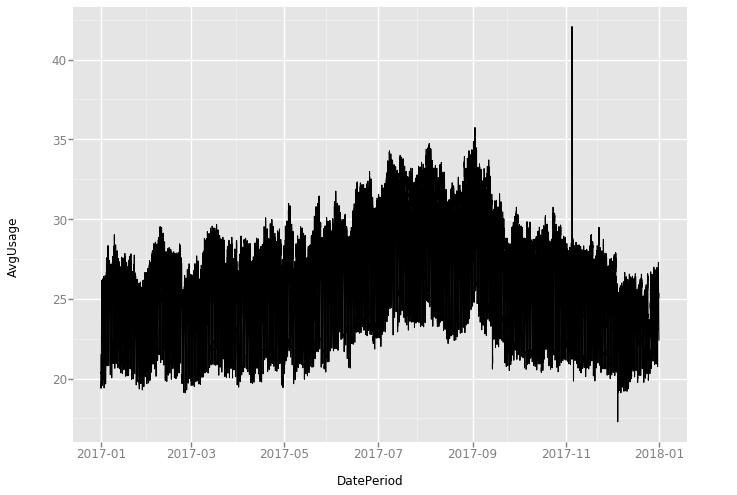

<ggplot: (-9223372036705089967)>

In [70]:
#Verify filtering by plotting
ggplot(dfLoad_ld2017, aes('DatePeriod', 'AvgUsage')) + geom_line(color='black')

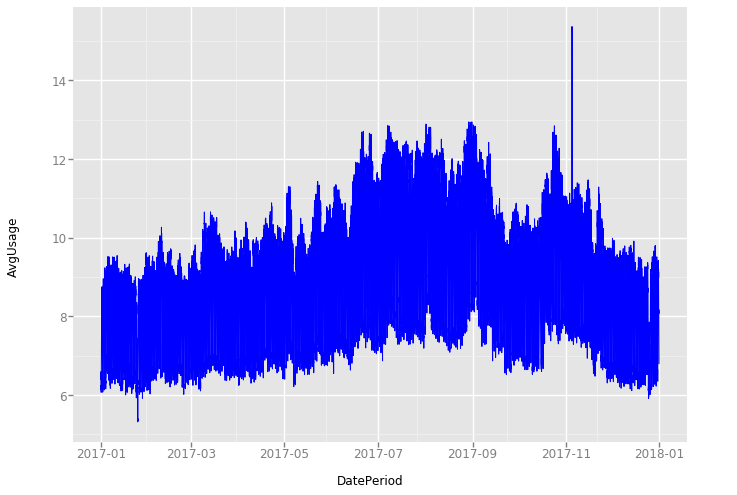

<ggplot: (149685845)>

In [71]:
ggplot(dfLoad_lgg2017, aes('DatePeriod', 'AvgUsage')) + geom_line(color='blue')

In [72]:
# Write clean data to file
pd.DataFrame.to_csv(dfLoad_ld2017,"dfLoad_ld_TOU_GS2B_Cell_Agg15_2017.csv")
pd.DataFrame.to_csv(dfLoad_lgg2017,"dfLoad_lgg_TOU_GS2B_Cell_Agg15_2017.csv")

### Fix daylight savings time issue

### Validate number of record needed per year

### Prompt user if number of records is not sufficient for algorithm 

### Descriptive analysis of normalized load shapes

In [73]:
dfLoad_ld2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year
96116,2017-01-01 00:00:00,709.3200,2017,21.494545,1,1,0,1
96117,2017-01-01 00:15:00,641.5202,2017,19.440006,1,1,0,1
96118,2017-01-01 00:30:00,649.0800,2017,19.669091,1,1,0,1
96119,2017-01-01 00:45:00,644.6400,2017,19.534545,1,1,0,1
96120,2017-01-01 01:00:00,639.8400,2017,19.389091,1,1,1,1


In [74]:
dfLoad_ld2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year
96116,2017-01-01 00:00:00,709.3200,2017,21.494545,1,1,0,1
96117,2017-01-01 00:15:00,641.5202,2017,19.440006,1,1,0,1
96118,2017-01-01 00:30:00,649.0800,2017,19.669091,1,1,0,1
96119,2017-01-01 00:45:00,644.6400,2017,19.534545,1,1,0,1
96120,2017-01-01 01:00:00,639.8400,2017,19.389091,1,1,1,1


The normalized value of ei for variable E in the ith row is calculated as:

$$Normalized (ei)=\frac{ei}{\frac{1}{p}\sum_{j=1}^p * ej}$$

Normalize by Mean: https://docs.tibco.com/pub/spotfire/6.5.2/doc/html/norm/norm_normalize_by_mean.htm
Latex: https://en.wikibooks.org/wiki/LaTeX/Mathematics

$$\frac{\n!}{k!(n-k)!} = \binom{n}{k}$$

$$Normalized (ei)=\frac{ei}{\frac{1}{p}\sum_{j=1}^p * ej}$$

In [75]:
#Calculate mean usage values for the year
dfLoad_ld2017Mean=dfLoad_ld2017.AvgUsage.mean()
dfLoad_ld2017Mean

26.351734750663375

In [76]:
dfLoad_lgg2017Mean=dfLoad_lgg2017.AvgUsage.mean()
dfLoad_lgg2017Mean

9.045706966178873

In [77]:
#Normalize consumption with average consumption
dfLoad_ld2017["NormAvg"]=dfLoad_ld2017["AvgUsage"]/dfLoad_ld2017Mean
dfLoad_lgg2017["NormAvg"]=dfLoad_lgg2017["AvgUsage"]/dfLoad_lgg2017Mean

C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
#Verify columns were added and calculated correctly
dfLoad_ld2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year,NormAvg
96116,2017-01-01 00:00:00,709.3200,2017,21.494545,1,1,0,1,0.815679
96117,2017-01-01 00:15:00,641.5202,2017,19.440006,1,1,0,1,0.737713
96118,2017-01-01 00:30:00,649.0800,2017,19.669091,1,1,0,1,0.746406
96119,2017-01-01 00:45:00,644.6400,2017,19.534545,1,1,0,1,0.741300
96120,2017-01-01 01:00:00,639.8400,2017,19.389091,1,1,1,1,0.735780


In [79]:
dfLoad_lgg2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year,NormAvg
96212,2017-01-01 00:00:00,580.80,2017,6.600000,1,1,0,1,0.729628
96213,2017-01-01 00:15:00,563.44,2017,6.402727,1,1,0,1,0.707819
96214,2017-01-01 00:30:00,575.00,2017,6.534091,1,1,0,1,0.722342
96215,2017-01-01 00:45:00,566.20,2017,6.434091,1,1,0,1,0.711287
96216,2017-01-01 01:00:00,577.64,2017,6.564091,1,1,1,1,0.725658


In [80]:
 #Create unique Normalized Average column names for combining files
dfLoad_ld2017.rename(columns = {'NormAvg':'ldNormAvg'}, inplace = True)
dfLoad_lgg2017.rename(columns = {'NormAvg':'lggNormAvg'}, inplace = True)

C:\Users\jamesan\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [81]:
#Verify added 
dfLoad_ld2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year,ldNormAvg
96116,2017-01-01 00:00:00,709.3200,2017,21.494545,1,1,0,1,0.815679
96117,2017-01-01 00:15:00,641.5202,2017,19.440006,1,1,0,1,0.737713
96118,2017-01-01 00:30:00,649.0800,2017,19.669091,1,1,0,1,0.746406
96119,2017-01-01 00:45:00,644.6400,2017,19.534545,1,1,0,1,0.741300
96120,2017-01-01 01:00:00,639.8400,2017,19.389091,1,1,1,1,0.735780


In [82]:
dfLoad_lgg2017.head()

,DatePeriod,Usage,year,AvgUsage,day,month,hour,day_of_year,lggNormAvg
96212,2017-01-01 00:00:00,580.80,2017,6.600000,1,1,0,1,0.729628
96213,2017-01-01 00:15:00,563.44,2017,6.402727,1,1,0,1,0.707819
96214,2017-01-01 00:30:00,575.00,2017,6.534091,1,1,0,1,0.722342
96215,2017-01-01 00:45:00,566.20,2017,6.434091,1,1,0,1,0.711287
96216,2017-01-01 01:00:00,577.64,2017,6.564091,1,1,1,1,0.725658


In [83]:
### Plot heatmaps and load duration curves
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Create new leader and laggard variables for plotting
dfLoad_lgg2017_HM=dfLoad_lgg2017
dfLoad_ld2017_HM=dfLoad_ld2017

In [85]:
del dfLoad_lgg2017_HM['DatePeriod']
del dfLoad_lgg2017_HM['month']
del dfLoad_lgg2017_HM['year']
del dfLoad_ld2017_HM['DatePeriod']
del dfLoad_ld2017_HM['month']
del dfLoad_ld2017_HM['year']

In [86]:
dfLoad_lgg2017_HM.head()

,Usage,AvgUsage,day,hour,day_of_year,lggNormAvg
96212,580.80,6.600000,1,0,1,0.729628
96213,563.44,6.402727,1,0,1,0.707819
96214,575.00,6.534091,1,0,1,0.722342
96215,566.20,6.434091,1,0,1,0.711287
96216,577.64,6.564091,1,1,1,0.725658


In [87]:
# ========= 
dfLoad_lgg2017_HM[dfLoad_lgg2017_HM.day_of_year == 4]

,Usage,AvgUsage,day,hour,day_of_year,lggNormAvg
96500,587.4000,6.675000,4,0,4,0.737919
96501,566.5601,6.438183,4,0,4,0.711739
96502,566.7200,6.440000,4,0,4,0.711940
96503,570.8000,6.486364,4,0,4,0.717065
96504,574.6800,6.530455,4,1,4,0.721940
96505,561.0000,6.375000,4,1,4,0.704754
96506,557.6400,6.336818,4,1,4,0.700533
96507,566.5600,6.438182,4,1,4,0.711739
96508,558.9200,6.351364,4,2,4,0.702141
96509,557.6800,6.337273,4,2,4,0.700583


In [88]:
dfLoad_ld2017_HM.head()

,Usage,AvgUsage,day,hour,day_of_year,ldNormAvg
96116,709.3200,21.494545,1,0,1,0.815679
96117,641.5202,19.440006,1,0,1,0.737713
96118,649.0800,19.669091,1,0,1,0.746406
96119,644.6400,19.534545,1,0,1,0.741300
96120,639.8400,19.389091,1,1,1,0.735780


In [89]:
#sExtract only hour, day of year and lggNormAvg columns
dfLoad_lgg2017_HM = dfLoad_lgg2017_HM[['hour', 'day_of_year', 'lggNormAvg']]
dfLoad_ld2017_HM = dfLoad_ld2017_HM[['hour', 'day_of_year', 'ldNormAvg']]


In [90]:
dfLoad_lgg2017_HM.head()

,hour,day_of_year,lggNormAvg
96212,0,1,0.729628
96213,0,1,0.707819
96214,0,1,0.722342
96215,0,1,0.711287
96216,1,1,0.725658


In [91]:
# ========= Test for missing data

dfLoad_lgg2017_HM[dfLoad_lgg2017_HM.day_of_year == 4]

,hour,day_of_year,lggNormAvg
96500,0,4,0.737919
96501,0,4,0.711739
96502,0,4,0.711940
96503,0,4,0.717065
96504,1,4,0.721940
96505,1,4,0.704754
96506,1,4,0.700533
96507,1,4,0.711739
96508,2,4,0.702141
96509,2,4,0.700583


In [92]:
dfLoad_ld2017_HM.head()

,hour,day_of_year,ldNormAvg
96116,0,1,0.815679
96117,0,1,0.737713
96118,0,1,0.746406
96119,0,1,0.741300
96120,1,1,0.735780


In [93]:
# Sum up 15 min kWh reads and average the result to get kWh for the hour  
dfLoad_lgg2017G=dfLoad_lgg2017.groupby(['hour', 'day_of_year'], as_index=False)['lggNormAvg'].mean()
dfLoad_ld2017G=dfLoad_ld2017.groupby(['hour', 'day_of_year'], as_index=False)['ldNormAvg'].mean()

In [94]:
dfLoad_lgg2017G.head()

,hour,day_of_year,lggNormAvg
0,0,1,0.717769
1,0,2,0.696890
2,0,3,0.698963
3,0,4,0.719666
4,0,5,0.741449


In [95]:
# ========= Test for missing data

dfLoad_lgg2017G[dfLoad_lgg2017G.day_of_year == 4]

,hour,day_of_year,lggNormAvg
3,0,4,0.719666
368,1,4,0.709742
733,2,4,0.694855
1097,3,4,0.702769
1462,4,4,0.716437
1827,5,4,0.778948
2192,6,4,0.893819
2557,7,4,0.930992
2922,8,4,0.941343
3287,9,4,0.964244


In [96]:
dfLoad_lgg2017G.lggNormAvg.isnull().sum()

0

In [97]:
#dfLoad_lgg2017G.lggNormAvg.value_counts(dropna = False)[np.nan]

In [98]:
dfLoad_ld2017G.head()

,hour,day_of_year,ldNormAvg
0,0,1,0.760274
1,0,2,0.760999
2,0,3,0.756273
3,0,4,0.769658
4,0,5,0.805536


In [99]:
dfLoad_ld2017G.ldNormAvg.isnull().sum()

0

In [100]:
#Reshape for 24 x365 heatmap format
dfLoad_lgg2017Pv =  dfLoad_lgg2017G.pivot("hour", "day_of_year", "lggNormAvg")

In [101]:
dfLoad_ld2017Pv =  dfLoad_ld2017G.pivot("hour", "day_of_year", "ldNormAvg")

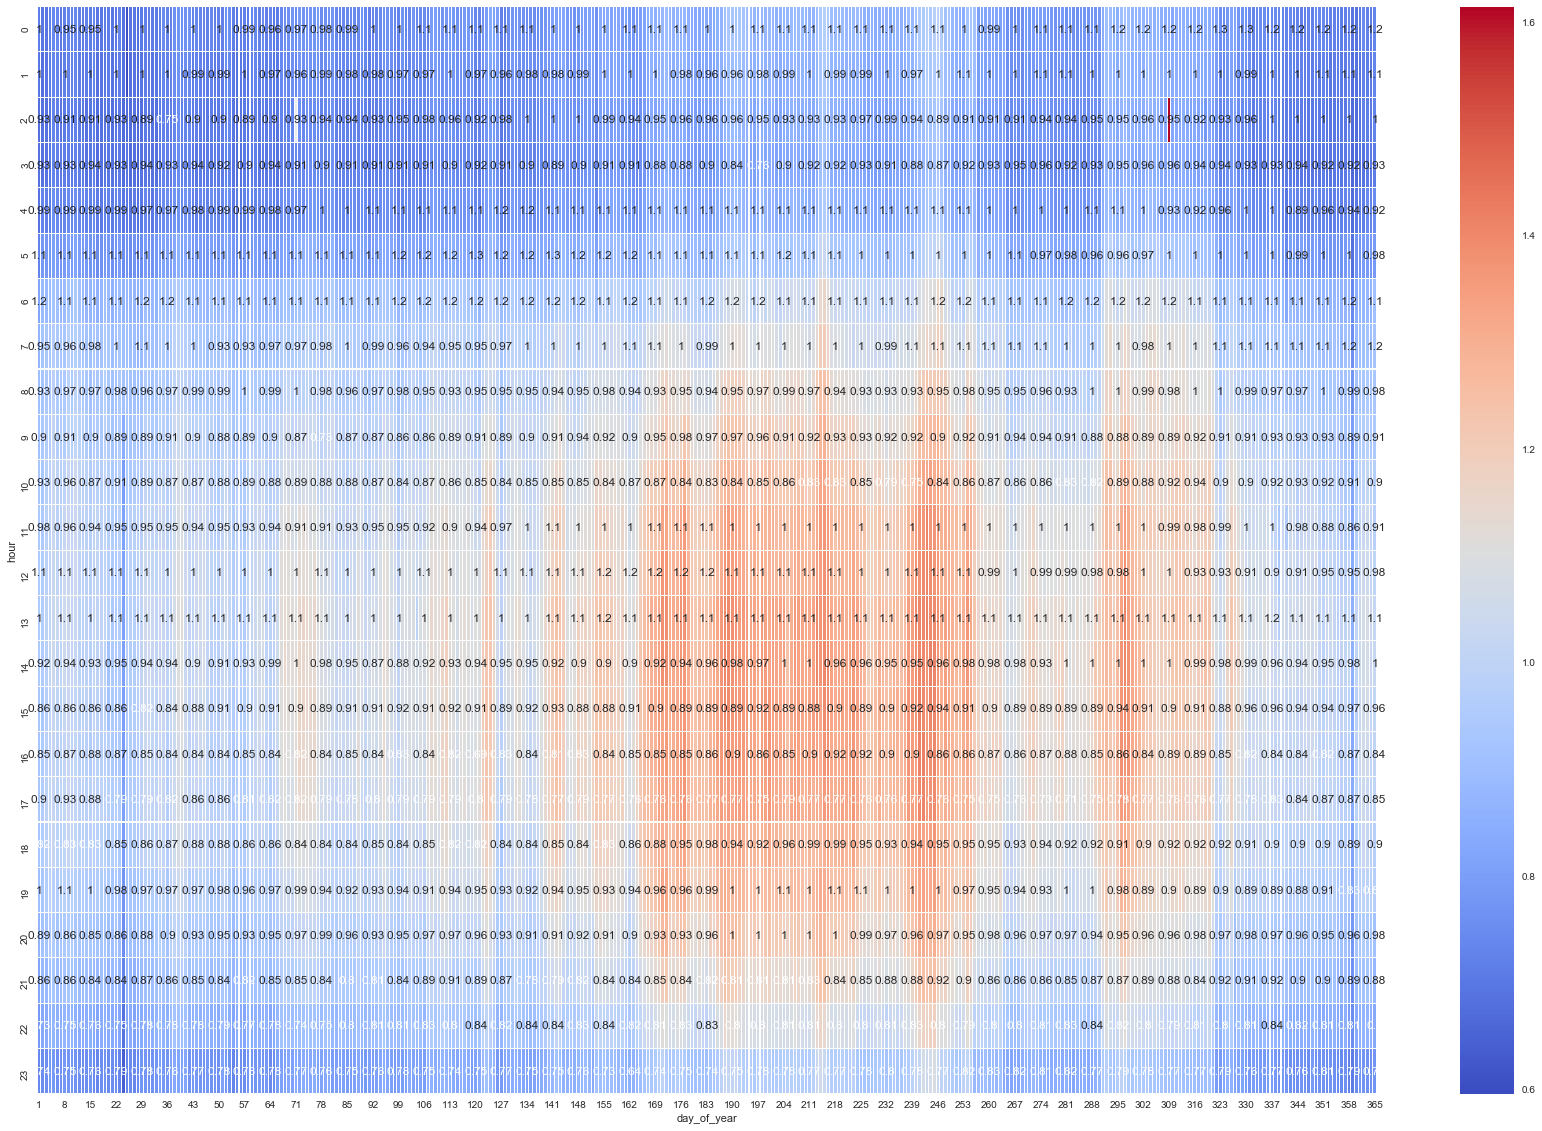

In [102]:
#Plot heatmap
%matplotlib inline
sns.set()
f, (ax) =  plt.subplots(figsize=(30, 20))
sns.heatmap(dfLoad_lgg2017Pv, linewidths=.02, ax=ax,annot=True, cmap='coolwarm', xticklabels=7)#cmap='coolwarm', square=True,, cmap="PiYG") #annot=True, #cmap="YlGnBu",cbar=False, cmap='coolwarm'

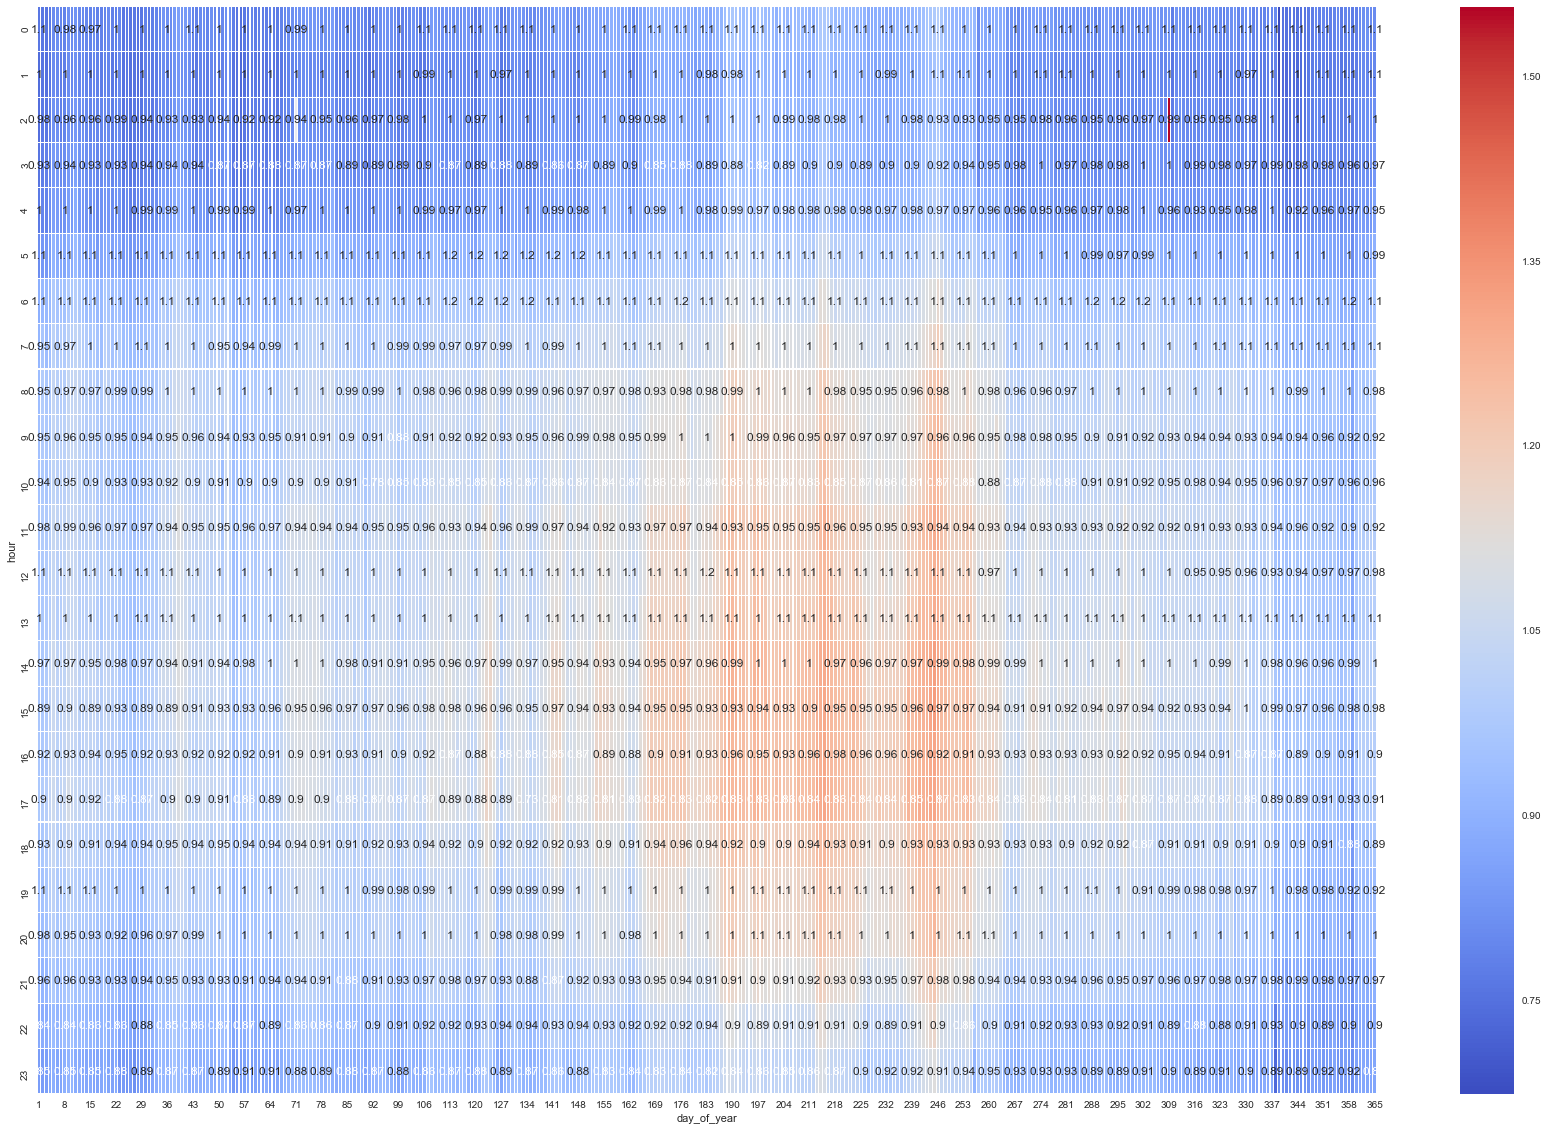

In [103]:
%matplotlib inline
sns.set()
f, (ax) =  plt.subplots(figsize=(30, 20))
sns.heatmap(dfLoad_ld2017Pv, linewidths=.05, ax=ax,annot=True, cmap='coolwarm',xticklabels=7)#cmap='coolwarm', square=True,, cmap="PiYG") #annot=True, #cmap="YlGnBu",cbar=False, cmap='coolwarm'

In [104]:
dfLoad_lgg2017Pv.head()

day_of_year,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
hour,,,,,,,,,,,,,,,,,,,,,
0,0.717769,0.696890,0.698963,0.719666,0.741449,0.735909,0.703435,0.722291,0.733221,0.730608,...,0.717379,0.722492,0.735708,0.691727,0.683662,0.708787,0.745821,0.724829,0.714955,0.733020
1,0.702895,0.682569,0.692368,0.709742,0.738183,0.728799,0.700194,0.717430,0.724025,0.723598,...,0.706450,0.709126,0.731650,0.679780,0.684466,0.696136,0.726776,0.718598,0.713950,0.731500
2,0.682619,0.684880,0.685672,0.694855,0.733459,0.721739,0.691250,0.705031,0.722379,0.707794,...,0.703322,0.700106,0.732844,0.667745,0.675132,0.692619,0.725017,0.715922,0.703008,0.730306
3,0.683184,0.690245,0.693134,0.702769,0.734716,0.719151,0.703021,0.707242,0.714578,0.706249,...,0.698561,0.704038,0.731851,0.659843,0.670145,0.687782,0.690684,0.708171,0.704528,0.708724
4,0.690270,0.729213,0.720696,0.716437,0.756650,0.745243,0.727543,0.732882,0.750381,0.739263,...,0.721801,0.732580,0.746550,0.669114,0.704490,0.719930,0.715294,0.748924,0.733459,0.749590


In [105]:
dfLoad_ld2017Pv.head()

day_of_year,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
hour,,,,,,,,,,,,,,,,,,,,,
0,0.760274,0.760999,0.756273,0.769658,0.805536,0.812056,0.791426,0.786941,0.816886,0.808537,...,0.775557,0.791323,0.787528,0.775626,0.783216,0.807571,0.813540,0.819335,0.807399,0.805502
1,0.740472,0.757756,0.748579,0.759895,0.805191,0.800085,0.774591,0.777247,0.810883,0.798947,...,0.759998,0.767070,0.775902,0.761068,0.774867,0.797084,0.804363,0.800361,0.799188,0.794773
2,0.743232,0.768968,0.763034,0.780801,0.818990,0.816127,0.782250,0.787700,0.824579,0.815092,...,0.777213,0.782940,0.797774,0.768588,0.797222,0.811504,0.815575,0.819094,0.817059,0.816541
3,0.758032,0.779145,0.782284,0.797394,0.840931,0.836412,0.802224,0.810366,0.835791,0.830133,...,0.785148,0.795394,0.804122,0.778351,0.802845,0.817369,0.820750,0.817645,0.816300,0.832376
4,0.768140,0.793324,0.790357,0.816783,0.853075,0.842760,0.817300,0.820405,0.852592,0.840069,...,0.801845,0.823751,0.823441,0.787942,0.823234,0.853109,0.842898,0.841828,0.836136,0.864528


In [106]:
#Plot Load Curves
sort_dfLoad_lgg2017G = dfLoad_lgg2017G.sort_values('lggNormAvg',ascending=False)
sort_dfLoad_ld2017G = dfLoad_ld2017G.sort_values('ldNormAvg',ascending=False)

In [107]:
sort_dfLoad_lgg2017G.head()

,hour,day_of_year,lggNormAvg
1037,2,309,1.614277
4986,13,243,1.418440
6080,16,242,1.415350
5352,14,244,1.414847
5714,15,241,1.414408


In [108]:
sort_dfLoad_ld2017G.head()

,hour,day_of_year,ldNormAvg
1037,2,309,1.556323
5718,15,245,1.330187
5353,14,245,1.323529
6083,16,245,1.307556
6448,17,245,1.307176


In [109]:
l = len(sort_dfLoad_lgg2017G)
l
l = len(sort_dfLoad_ld2017G)
l

8759

In [110]:
sort_dfLoad_lgg2017G = sort_dfLoad_lgg2017G.reset_index() #drop=True
sort_dfLoad_ld2017G = sort_dfLoad_ld2017G.reset_index() #drop=True

In [111]:
sort_dfLoad_lgg2017G.head()

,index,hour,day_of_year,lggNormAvg
0,1037,2,309,1.614277
1,4986,13,243,1.418440
2,6080,16,242,1.415350
3,5352,14,244,1.414847
4,5714,15,241,1.414408


In [112]:
sort_dfLoad_ld2017G.head()

,index,hour,day_of_year,ldNormAvg
0,1037,2,309,1.556323
1,5718,15,245,1.330187
2,5353,14,245,1.323529
3,6083,16,245,1.307556
4,6448,17,245,1.307176


In [113]:
import matplotlib.pyplot as plt

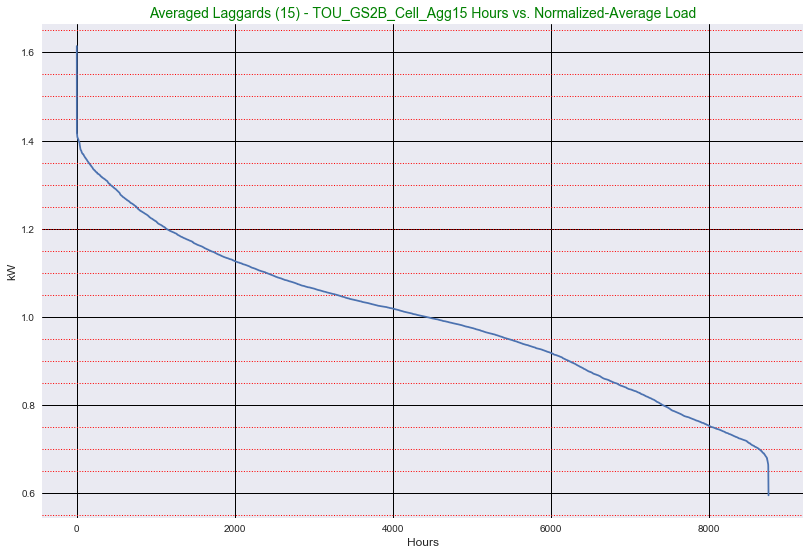

In [114]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(2,2,1)
plt.plot(sort_dfLoad_lgg2017G.index,sort_dfLoad_lgg2017G.lggNormAvg)
plt.title('Averaged Laggards (15) - TOU_GS2B_Cell_Agg15 Hours vs. Normalized-Average Load',size = 14,color = 'g')
plt.xlabel('Hours',size = 12)
plt.ylabel('kW',size = 12)
plt.grid(b = True,which = 'major',color ='k',linestyle = '-')
plt.minorticks_on()
plt.grid(b = True,which = 'minor',axis = 'y',color ='r',linestyle = ':')

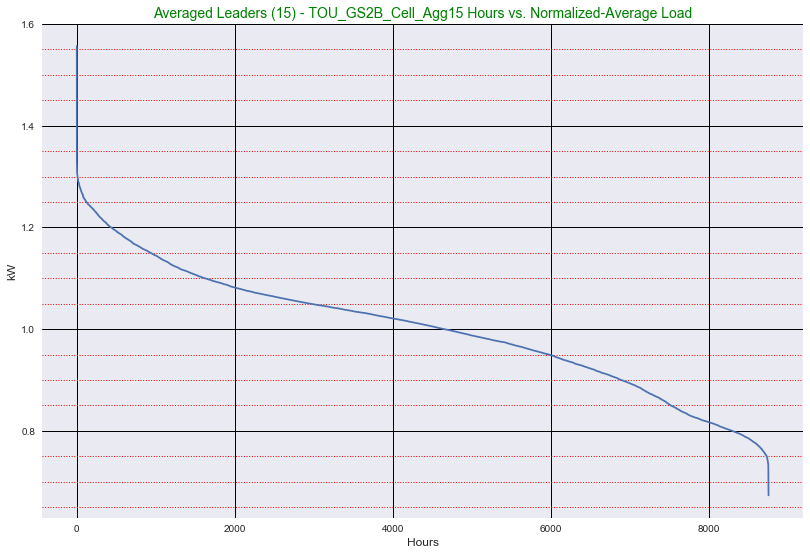

In [115]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(2,2,1)
plt.plot(sort_dfLoad_ld2017G.index,sort_dfLoad_ld2017G.ldNormAvg)
plt.title('Averaged Leaders (15) - TOU_GS2B_Cell_Agg15 Hours vs. Normalized-Average Load',size = 14,color = 'g')
plt.xlabel('Hours',size = 12)
plt.ylabel('kW',size = 12)
plt.grid(b = True,which = 'major',color ='k',linestyle = '-')
plt.minorticks_on()
plt.grid(b = True,which = 'minor',axis = 'y',color ='r',linestyle = ':')

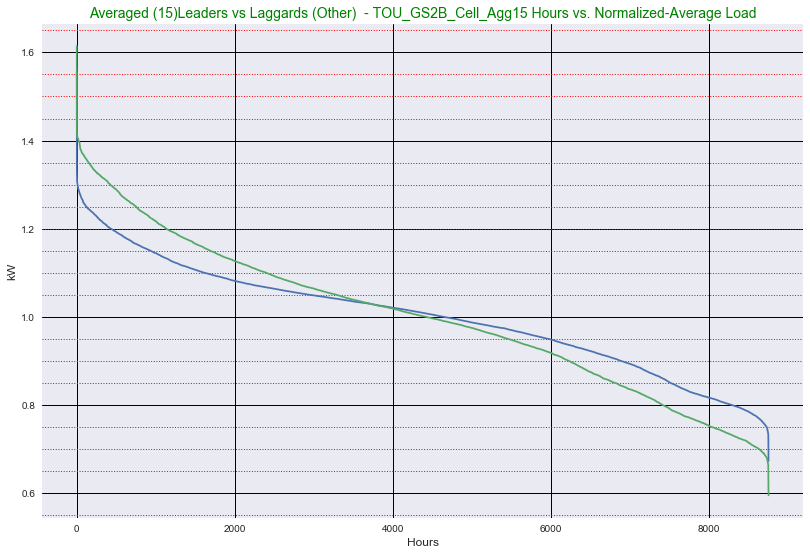

In [116]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(2,2,1)
plt.plot(sort_dfLoad_ld2017G.index,sort_dfLoad_ld2017G.ldNormAvg,label='Leaders')
plt.plot(sort_dfLoad_lgg2017G.index,sort_dfLoad_lgg2017G.lggNormAvg,label='Other')
plt.title('Averaged (15)Leaders vs Laggards (Other)  - TOU_GS2B_Cell_Agg15 Hours vs. Normalized-Average Load',size = 14,color = 'g')
plt.xlabel('Hours',size = 12)
plt.ylabel('kW',size = 12)
plt.grid(b = True,which = 'major',color ='k',linestyle = '-')
plt.minorticks_on()
plt.grid(b = True,which = 'minor',axis = 'y',color ='r',linestyle = ':')

## Calculate Daily Area between daily load duration curves


## Denormalize load difference using the Laggard

## Separate peaky (A) vs full load (B)

## Flexibility Supply Curve for NAICS/Rate Combination (Winter and Summer Weekday and Weekend)

## Validation of the Flexibility Supply Curve of NAICS/Rate Pair using LBNL Demand Response Study

## Validation of the Flexibility Supply Curve using Demo site NAICS code and similar NAICS/Rate Pair from SCE (15_15 format) 

## Validation Report 